# <center>              **-----------------------**               </center>
# <center>                     **Nursery**                 </center>
# <center>              **-----------------------**             </center>

* ### Import lib & models

In [40]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# import necessary modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

* ### EDA

In [ ]:
# reads dataset
df=pd.read_csv('nursery.csv')
df.head()

,parents,has_nurs,form,children,housing,finance,social,health,final evaluation
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   parents           12960 non-null  object
 1   has_nurs          12960 non-null  object
 2   form              12960 non-null  object
 3   children          12960 non-null  object
 4   housing           12960 non-null  object
 5   finance           12960 non-null  object
 6   social            12960 non-null  object
 7   health            12960 non-null  object
 8   final evaluation  12960 non-null  object
dtypes: object(9)
memory usage: 911.4+ KB


In [44]:
df.describe()

,parents,has_nurs,form,children,housing,finance,social,health,final evaluation
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,usual,proper,complete,1,convenient,convenient,nonprob,recommended,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


In [ ]:
le=LabelEncoder()
for column in df.columns:
    df[column]=le.fit_transform(df[column])

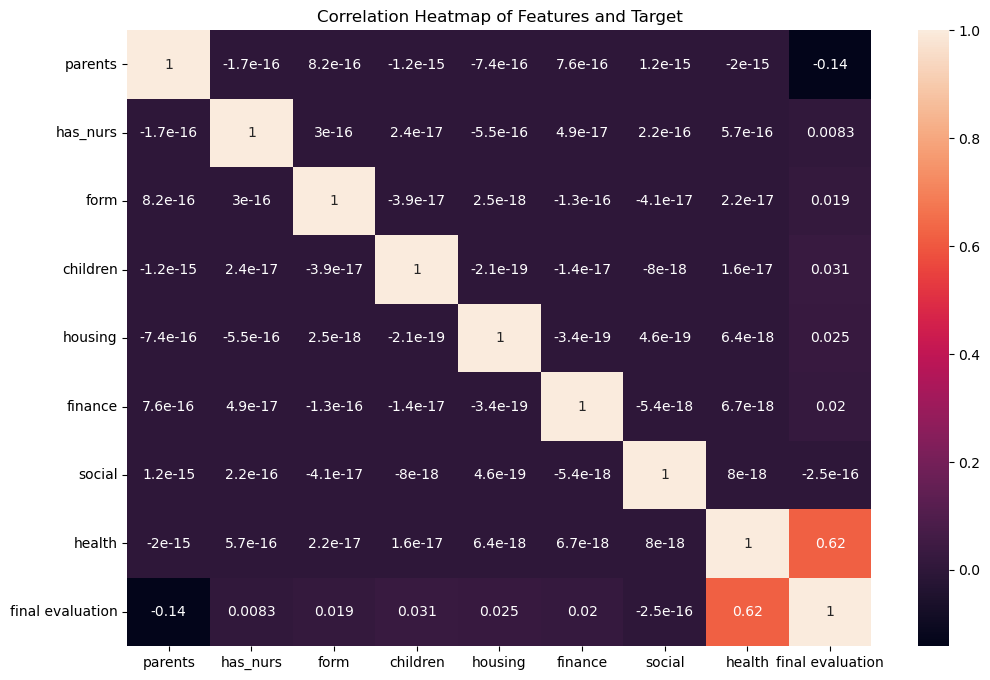

In [46]:
# Correlation heatmap (on encoded data)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap of Features and Target')
plt.show()

<Figure size 1000x1000 with 0 Axes>

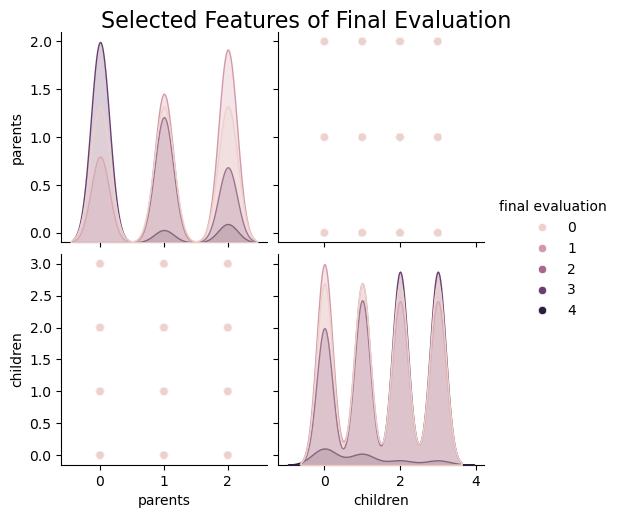

In [ ]:
# Pairplot to visualize relationships between features
plt.figure(figsize=(10, 10))
sns.pairplot(df[['parents', 'children', 'final evaluation']], hue='final evaluation')
plt.suptitle('Selected Features of Final Evaluation', y=1.02, fontsize=16)
plt.show()


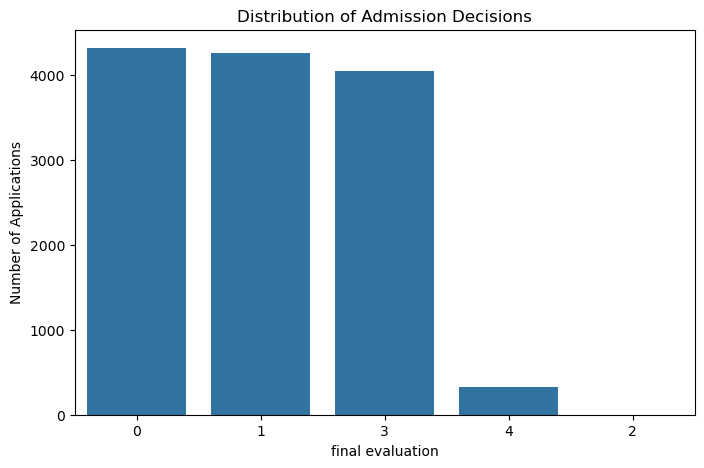

In [47]:
# Visualizing the target distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='final evaluation', order=df['final evaluation'].value_counts().index)
plt.title('Distribution of Admission Decisions')
plt.ylabel('Number of Applications')
plt.show()

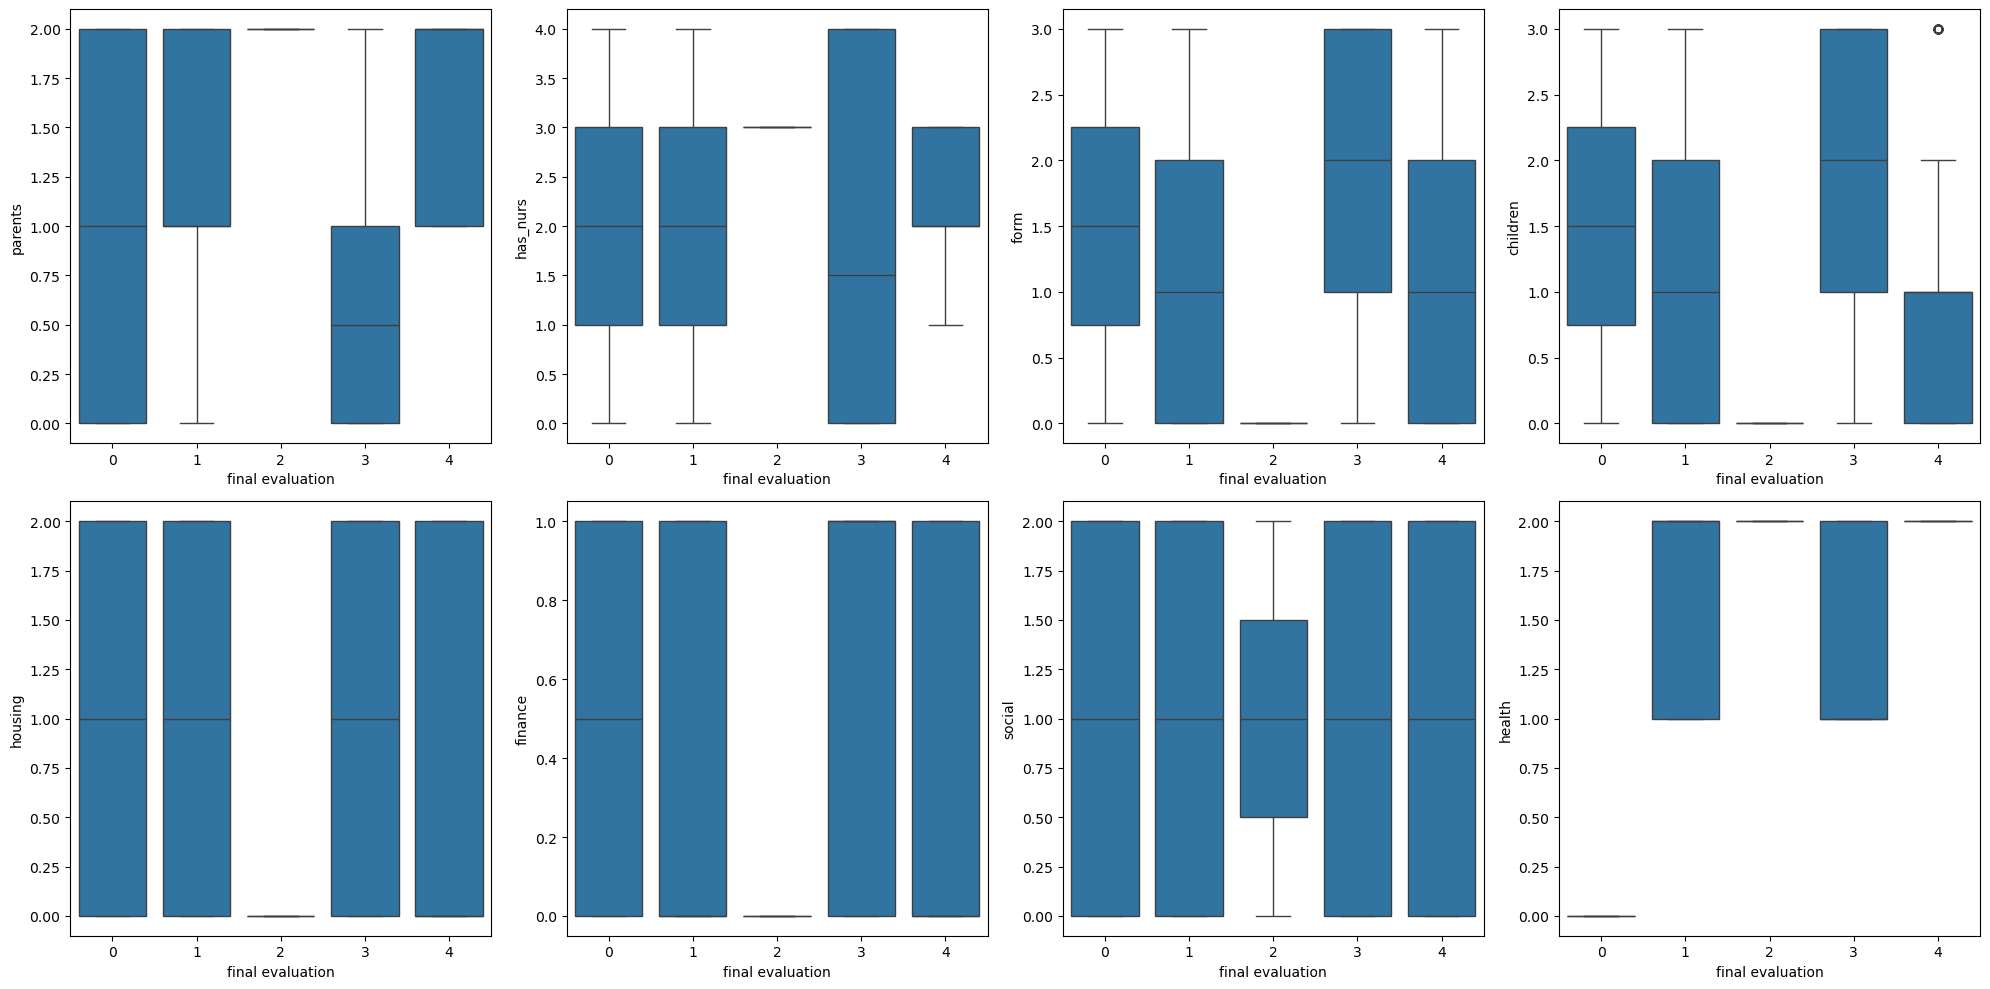

In [ ]:
# Boxplots for each feature against the target
fig, axes = plt.subplots(2, 4, figsize=(20,10))
for i, col in enumerate(df.columns[:-1]):
    row, col_idx = i//4, i%4
    sns.boxplot(data=df, x='final evaluation', y=col, ax=axes[row, col_idx])
plt.tight_layout()
plt.show()

In [ ]:
# Prepare data for modeling
x=df.drop('final evaluation',axis=1)
y=df['final evaluation']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

* ### Models & Graphical show

In [ ]:
# Define models to evaluate
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(),
    "MLP": MLPClassifier(max_iter=300)    
}


In [ ]:
# Train and evaluate each model
results = []
full_report = {}

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    results.append({
        "Model":model_name, 
        "Accuracy":accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted')
     })

full_report[model_name] = classification_report(y_test, y_pred, output_dict=True)
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.995370,0.994740,0.995370,0.995019
1,Random Forest,0.980324,0.979536,0.980324,0.979715
2,KNN,0.936343,0.935820,0.936343,0.932631
3,MLP,0.998457,0.997699,0.998457,0.998076


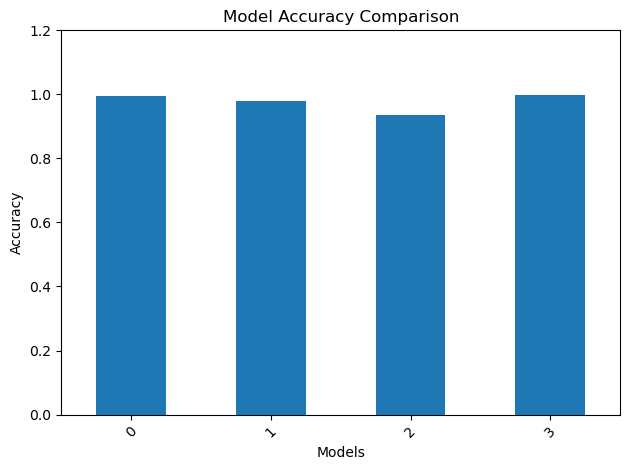

In [13]:
results_df["Accuracy"].plot(kind="bar")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.ylim(0, 1.2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

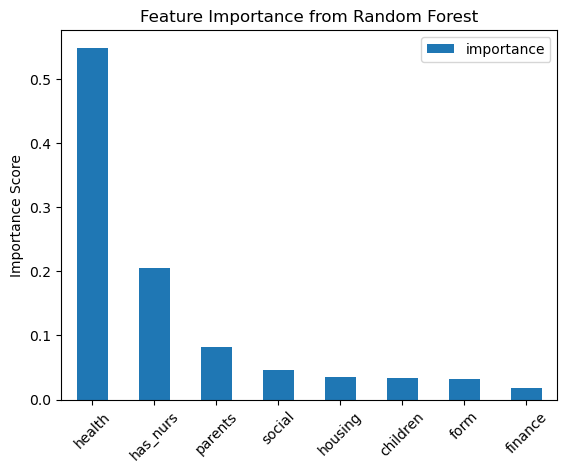

In [ ]:
# Feature importance from Random Forest
rf = models["Random Forest"]
feature_importances = pd.DataFrame(rf.feature_importances_, index=x.columns, columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature of Random Forest')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.show()